In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats

DATA_URL = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df = pd.read_csv(DATA_URL, index_col=[0])

def sales_format(num):
  last = len(num) - 1
  try:
    return float(num) * 1000
  except:
    if num[last] == 'M':
      return float(num[:last]) * 1000
    elif num[last] == 'K':
      return float(num[:last]) * 1
    else:
      raise Exception(num)
      
def years_format(year):
  if year > 1900:
    return year
  elif year <= 21:
    return year + 2000
  elif year < 100:
    return year + 1900
  else:
    return 0

regions = ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']
for sales in regions:
  df[sales] = df[sales].apply(sales_format)
df['Year'] = df['Year'].apply(years_format)
# df['Total_Sales'] = (df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'])
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0,0.0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0,0.0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0,0.0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150.0,40.0,0.0,10.0
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10.0,0.0,0.0,0.0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50.0,50.0,250.0,30.0


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47101 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_

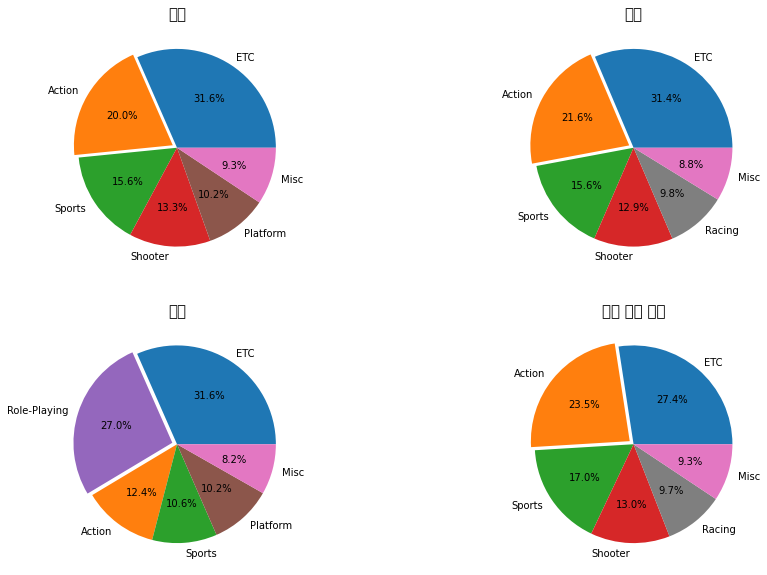

In [255]:
sales_by_genre = df[['Genre', *regions]].groupby('Genre').sum()
# stats.chi2_contingency(sales_by_genre, correction=False)

def make_etc_bundle(region):
  sorted= sales_by_genre.reset_index()[[region, 'Genre']].sort_values(by=region, ascending=False)
  sorted['Genre'] = [ g if idx < 5 else 'ETC' for idx, g in enumerate(sorted['Genre'])]
  df = pd.DataFrame(sorted).groupby('Genre').sum()
  return df.sort_values(by=region, ascending=False)

na = make_etc_bundle('NA_Sales')
eu = make_etc_bundle('EU_Sales')
jp = make_etc_bundle('JP_Sales')
other = make_etc_bundle('Other_Sales')

colours = {'ETC': 'C0',
           'Action': 'C1',
           'Sports': 'C2',
           'Shooter': 'C3',
           'Role-Playing': 'C4',
           'Platform': 'C5',
           'Misc': 'C6',
           'Racing': 'C7'}
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].set_title('NA_Sales', fontsize=15)
axs[0, 0].pie(na['NA_Sales'],
              labels=na.index,
              autopct='%1.1f%%', 
              colors=[colours[key] for key in na.index],
              explode=(0, 0.05, 0, 0, 0, 0))
axs[0, 1].set_title('EU_Sales', fontsize=15)
axs[0, 1].pie(eu['EU_Sales'],
              labels=eu.index,
              autopct='%1.1f%%',
              colors=[colours[key] for key in eu.index],
              explode=(0, 0.05, 0, 0, 0, 0))
axs[1, 0].set_title('JP_Sales', fontsize=15)
axs[1, 0].pie(jp['JP_Sales'],
              labels=jp.index,
              autopct='%1.1f%%',
              colors=[colours[key] for key in jp.index],
              explode=(0, 0.05, 0, 0, 0, 0))
axs[1, 1].set_title('Other_Sales', fontsize=15)
axs[1, 1].pie(other['Other_Sales'],
              labels=other.index,
              autopct='%1.1f%%',
              colors=[colours[key] for key in other.index],
              explode=(0, 0.05, 0, 0, 0, 0))
plt.show()

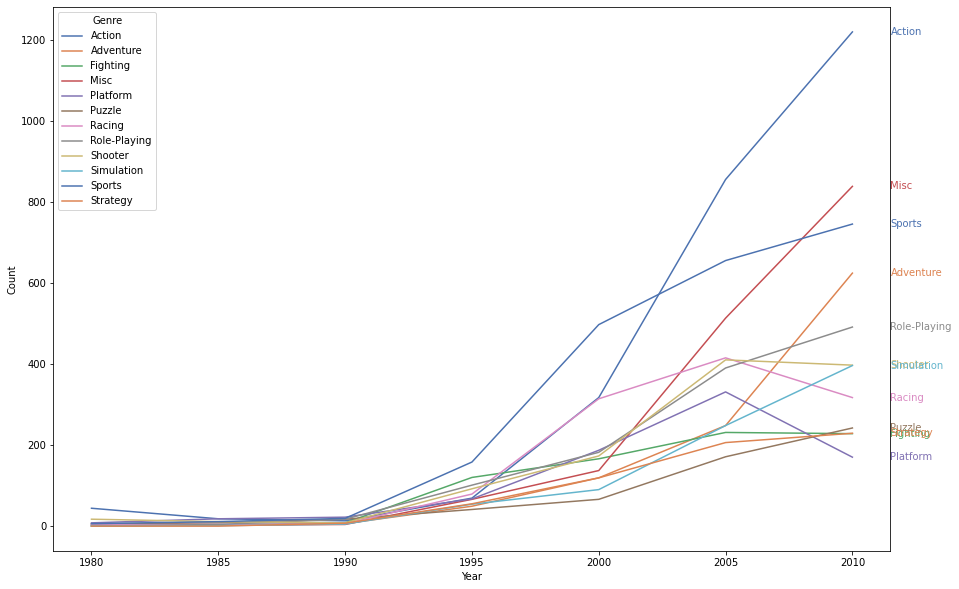

In [196]:
df_trend = df[['Year', 'Genre']]
df_trend = df_trend[df_trend['Year'] != 0]
df_trend['Year'] = df_trend['Year'].apply(lambda x: 5 * round(x / 5))

cross_trend = df_trend.groupby(['Year', 'Genre']).size().unstack(1).fillna(0)
cross_trend = cross_trend[:-2]
stats.chi2_contingency(cross_trend, correction=False)

tidy_trend = cross_trend.stack().reset_index().rename(columns={0:'Count'})
plt.figure(figsize=(15,10))
g = sns.lineplot(x='Year', y='Count', data=tidy_trend, hue='Genre', palette='deep')
for idx, l in enumerate(g.lines):
    y = l.get_ydata()
    if len(y) > 0:
      g.annotate(tidy_trend['Genre'][idx], xy=(1,y[-1]), xycoords=('axes fraction', 'data'), 
                    ha='left', va='center', color=l.get_color())

In [162]:
5 * round(2012.0 / 5)

2010